<a href="https://colab.research.google.com/github/NiazBinSiraj/ML-Testing/blob/main/2D_Cluster_of_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In this IRIS dataset there are 4 types of data which can be used to determine the class of the IRIS flower.
They are -
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

In this program I tried to find if I use any two types of above data what is the maximum accuracy I can achieve by using minimum distance to mean classifire. Also I've ploted the data in a 2d scatter matrix to observe the clusters visually.


# Result
After the analysis I've found that the maximum accuracy is 96.29629629629629 by using Petal Length and Petal Width.

# Loading Libraries



In [ ]:
# Load libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean
from sklearn.metrics import accuracy_score
import math

# Loading IRIS Dataset

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# Viewing Some Data

In [ ]:
  print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Class Distribution

In [ ]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Separate Sepal Data

In [ ]:
irisSetosaSepalLength = []
irisSetosaSepalWidth = []

irisVersicolorSepalLength = []
irisVersicolorSepalWidth = []

irisVirginicaSepalLength = []
irisVirginicaSepalWidth = []

for i in range(150):
  if(dataset.values[i][4] == 'Iris-setosa'):
    irisSetosaSepalLength.append(dataset.values[i][0])
    irisSetosaSepalWidth.append(dataset.values[i][1])
  elif(dataset.values[i][4] == 'Iris-versicolor'):
    irisVersicolorSepalLength.append(dataset.values[i][0])
    irisVersicolorSepalWidth.append(dataset.values[i][1])
  elif(dataset.values[i][4] == 'Iris-virginica'):
    irisVirginicaSepalLength.append(dataset.values[i][0])
    irisVirginicaSepalWidth.append(dataset.values[i][1])


print(irisSetosaSepalLength)
print(irisSetosaSepalWidth)
print(irisVersicolorSepalLength)
print(irisVersicolorSepalWidth)
print(irisVirginicaSepalLength)
print(irisVirginicaSepalWidth)

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0]
[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3]
[7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7]
[3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2

# Separate Petal Data

In [ ]:
irisSetosaPetalLength = []
irisSetosaPetalWidth = []

irisVersicolorPetalLength = []
irisVersicolorPetalWidth = []

irisVirginicaPetalLength = []
irisVirginicaPetalWidth = []

for i in range(150):
  if(dataset.values[i][4] == 'Iris-setosa'):
    irisSetosaPetalLength.append(dataset.values[i][2])
    irisSetosaPetalWidth.append(dataset.values[i][3])
  elif(dataset.values[i][4] == 'Iris-versicolor'):
    irisVersicolorPetalLength.append(dataset.values[i][2])
    irisVersicolorPetalWidth.append(dataset.values[i][3])
  elif(dataset.values[i][4] == 'Iris-virginica'):
    irisVirginicaPetalLength.append(dataset.values[i][2])
    irisVirginicaPetalWidth.append(dataset.values[i][3])


print(irisSetosaPetalLength)
print(irisSetosaPetalWidth)
print(irisVersicolorPetalLength)
print(irisVersicolorPetalWidth)
print(irisVirginicaPetalLength)
print(irisVirginicaPetalWidth)

[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]
[4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1]
[1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1

# Create Validation Dataset

In [ ]:
validate = []
for i in range(32,50):
  validate.append(dataset.values[i][4])
for i in range(82,100):
  validate.append(dataset.values[i][4])
for i in range(132,150):
  validate.append(dataset.values[i][4])

print(validate)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']


# Create Train Dataset

In [ ]:
irisSetosaSepalLength_train = []
irisSetosaSepalWidth_train = []
irisSetosaPetalLength_train = []
irisSetosaPetalWidth_train = []

irisVersicolorSepalLength_train = []
irisVersicolorSepalWidth_train = []
irisVersicolorPetalLength_train = []
irisVersicolorPetalWidth_train = []

irisVirginicaSepalLength_train = []
irisVirginicaSepalWidth_train = []
irisVirginicaPetalLength_train = []
irisVirginicaPetalWidth_train = []


irisSetosaSepalLength_train = irisSetosaSepalLength[0:32]
irisSetosaSepalWidth_train = irisSetosaSepalWidth[0:32]
irisSetosaPetalLength_train = irisSetosaPetalLength[0:32]
irisSetosaPetalWidth_train = irisSetosaPetalWidth[0:32]

irisVersicolorSepalLength_train = irisVersicolorSepalLength[0:32]
irisVersicolorSepalWidth_train = irisVersicolorSepalWidth[0:32]
irisVersicolorPetalLength_train = irisVersicolorPetalLength[0:32]
irisVersicolorPetalWidth_train = irisVersicolorPetalWidth[0:32]

irisVirginicaSepalLength_train = irisVirginicaSepalLength[0:32]
irisVirginicaSepalWidth_train = irisVirginicaSepalWidth[0:32]
irisVirginicaPetalLength_train = irisVirginicaPetalLength[0:32]
irisVirginicaPetalWidth_train = irisVirginicaPetalWidth[0:32]

# Calculate Arithmetic Mean

In [ ]:
irisSetosaSepalLengthMean = mean(irisSetosaSepalLength_train)
irisSetosaSepalWidthMean = mean(irisSetosaSepalWidth_train)
irisSetosaPetalLengthMean = mean(irisSetosaPetalLength_train)
irisSetosaPetalWidthMean = mean(irisSetosaPetalWidth_train)

irisVersicolorSepalLengthMean = mean(irisVersicolorSepalLength_train)
irisVersicolorSepalWidthMean = mean(irisVersicolorSepalWidth_train)
irisVersicolorPetalLengthMean = mean(irisVersicolorPetalLength_train)
irisVersicolorPetalWidthMean = mean(irisVersicolorPetalWidth_train)

irisVirginicaSepalLengthMean = mean(irisVirginicaSepalLength_train)
irisVirginicaSepalWidthMean = mean(irisVirginicaSepalWidth_train)
irisVirginicaPetalLengthMean = mean(irisVirginicaPetalLength_train)
irisVirginicaPetalWidthMean = mean(irisVirginicaPetalWidth_train)

# 2D Cluster **(Sepal Length - Sepal Width)**

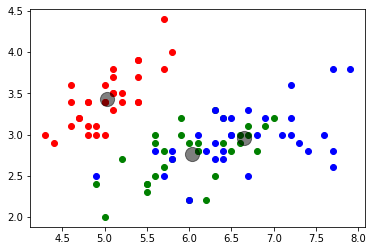

In [ ]:
pyplot.scatter(irisSetosaSepalLength_train, irisSetosaSepalWidth_train, color='r')
pyplot.scatter(irisSetosaSepalLengthMean, irisSetosaSepalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorSepalLength_train, irisVersicolorSepalWidth_train, color='g')
pyplot.scatter(irisVersicolorSepalLengthMean, irisVersicolorSepalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaSepalLength_train, irisVirginicaSepalWidth_train, color='b')
pyplot.scatter(irisVirginicaSepalLengthMean, irisVirginicaSepalWidthMean, c='black', s=200, alpha=0.5)


# 2D Cluster **(Petal Length - Petal Width)**

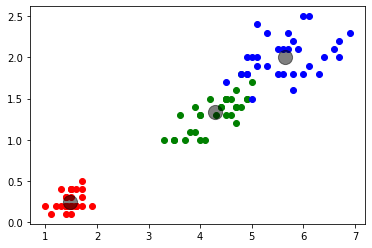

In [ ]:
pyplot.scatter(irisSetosaPetalLength_train, irisSetosaPetalWidth_train, color='r')
pyplot.scatter(irisSetosaPetalLengthMean, irisSetosaPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorPetalLength_train, irisVersicolorPetalWidth_train, color='g')
pyplot.scatter(irisVersicolorPetalLengthMean, irisVersicolorPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaPetalLength_train, irisVirginicaPetalWidth_train, color='b')
pyplot.scatter(irisVirginicaPetalLengthMean, irisVirginicaPetalWidthMean, c='black', s=200, alpha=0.5)

# 2D Cluster **(Petal Length - Sepal Width)**

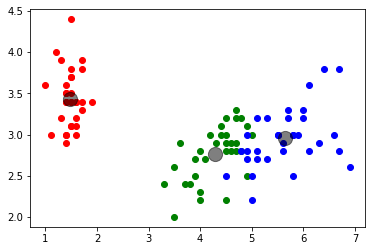

In [ ]:
pyplot.scatter(irisSetosaPetalLength_train, irisSetosaSepalWidth_train, color='r')
pyplot.scatter(irisSetosaPetalLengthMean, irisSetosaSepalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorPetalLength_train, irisVersicolorSepalWidth_train, color='g')
pyplot.scatter(irisVersicolorPetalLengthMean, irisVersicolorSepalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaPetalLength_train, irisVirginicaSepalWidth_train, color='b')
pyplot.scatter(irisVirginicaPetalLengthMean, irisVirginicaSepalWidthMean, c='black', s=200, alpha=0.5)

# 2D Cluster **(Sepal Length - Petal Width)**

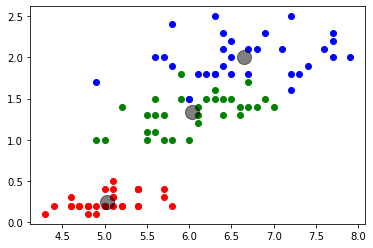

In [ ]:
pyplot.scatter(irisSetosaSepalLength_train, irisSetosaPetalWidth_train, color='r')
pyplot.scatter(irisSetosaSepalLengthMean, irisSetosaPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorSepalLength_train, irisVersicolorPetalWidth_train, color='g')
pyplot.scatter(irisVersicolorSepalLengthMean, irisVersicolorPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaSepalLength_train, irisVirginicaPetalWidth_train, color='b')
pyplot.scatter(irisVirginicaSepalLengthMean, irisVirginicaPetalWidthMean, c='black', s=200, alpha=0.5)

# 2D Cluster **(Sepal Length - Petal Length)**

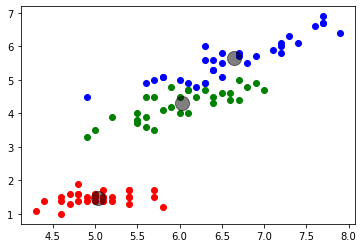

In [ ]:
pyplot.scatter(irisSetosaSepalLength_train, irisSetosaPetalLength_train, color='r')
pyplot.scatter(irisSetosaSepalLengthMean, irisSetosaPetalLengthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorSepalLength_train, irisVersicolorPetalLength_train, color='g')
pyplot.scatter(irisVersicolorSepalLengthMean, irisVersicolorPetalLengthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaSepalLength_train, irisVirginicaPetalLength_train, color='b')
pyplot.scatter(irisVirginicaSepalLengthMean, irisVirginicaPetalLengthMean, c='black', s=200, alpha=0.5)

# 2D Cluster **(Sepal Width - Petal Width)**

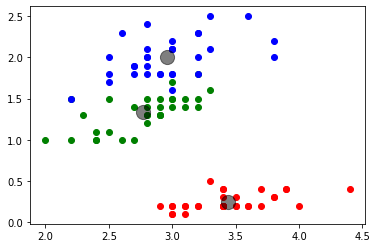

In [ ]:
pyplot.scatter(irisSetosaSepalWidth_train, irisSetosaPetalWidth_train, color='r')
pyplot.scatter(irisSetosaSepalWidthMean, irisSetosaPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVersicolorSepalWidth_train, irisVersicolorPetalWidth_train, color='g')
pyplot.scatter(irisVersicolorSepalWidthMean, irisVersicolorPetalWidthMean, c='black', s=200, alpha=0.5)

pyplot.scatter(irisVirginicaSepalWidth_train, irisVirginicaPetalWidth_train, color='b')
pyplot.scatter(irisVirginicaSepalWidthMean, irisVirginicaPetalWidthMean, c='black', s=200, alpha=0.5)

# Define Predictor

In [ ]:
def dist(x1,y1,x2,y2):
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def predictIrisClass(x,y, type):
  if(type == "SL_SW"):
    dis_setosa = dist(x,y,irisSetosaSepalLengthMean, irisSetosaSepalWidthMean)
    dis_virginica = dist(x,y, irisVirginicaSepalLengthMean, irisVirginicaSepalWidthMean)
    dis_versicolor = dist(x,y, irisVersicolorSepalLengthMean, irisVersicolorSepalWidthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"

  elif(type == "PL_PW"):
    dis_setosa = dist(x,y,irisSetosaPetalLengthMean, irisSetosaPetalWidthMean)
    dis_virginica = dist(x,y, irisVirginicaPetalLengthMean, irisVirginicaPetalWidthMean)
    dis_versicolor = dist(x,y, irisVersicolorPetalLengthMean, irisVersicolorPetalWidthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"

  elif(type == "PL_SW"):
    dis_setosa = dist(x,y,irisSetosaPetalLengthMean, irisSetosaSepalWidthMean)
    dis_virginica = dist(x,y, irisVirginicaPetalLengthMean, irisVirginicaSepalWidthMean)
    dis_versicolor = dist(x,y, irisVersicolorPetalLengthMean, irisVersicolorSepalWidthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"

  elif(type == "SL_PW"):
    dis_setosa = dist(x,y,irisSetosaSepalLengthMean, irisSetosaPetalWidthMean)
    dis_virginica = dist(x,y, irisVirginicaSepalLengthMean, irisVirginicaPetalWidthMean)
    dis_versicolor = dist(x,y, irisVersicolorSepalLengthMean, irisVersicolorPetalWidthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"

  elif(type == "SL_PL"):
    dis_setosa = dist(x,y,irisSetosaSepalLengthMean, irisSetosaPetalLengthMean)
    dis_virginica = dist(x,y, irisVirginicaSepalLengthMean, irisVirginicaPetalLengthMean)
    dis_versicolor = dist(x,y, irisVersicolorSepalLengthMean, irisVersicolorPetalLengthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"

  elif(type == "SW_PW"):
    dis_setosa = dist(x,y,irisSetosaSepalWidthMean, irisSetosaPetalWidthMean)
    dis_virginica = dist(x,y, irisVirginicaSepalWidthMean, irisVirginicaPetalWidthMean)
    dis_versicolor = dist(x,y, irisVersicolorSepalWidthMean, irisVersicolorPetalWidthMean)
    if(dis_setosa < dis_virginica and dis_setosa < dis_versicolor):
      return "Iris-setosa"
    elif(dis_virginica < dis_setosa and dis_virginica < dis_versicolor):
      return "Iris-virginica"
    else:
      return "Iris-versicolor"
  
  else:
    return "Invalid Type"

# Make Prediction using (Sepal Length, Sepal Width)

In [ ]:
prediction_SL_SW = []

for i in range(32,50):
  prediction_SL_SW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][1], "SL_SW"))
for i in range(82,100):
  prediction_SL_SW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][1], "SL_SW"))
for i in range(132,150):
  prediction_SL_SW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][1], "SL_SW"))

# Make Prediction using (Petal Length, Petal Width)

In [ ]:
prediction_PL_PW = []

for i in range(32,50):
  prediction_PL_PW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][3], "PL_PW"))
for i in range(82,100):
  prediction_PL_PW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][3], "PL_PW"))
for i in range(132,150):
  prediction_PL_PW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][3], "PL_PW"))

# Make Prediction using (Petal Length, Sepal Width)

In [ ]:
prediction_PL_SW = []

for i in range(32,50):
  prediction_PL_SW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][1], "PL_SW"))
for i in range(82,100):
  prediction_PL_SW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][1], "PL_SW"))
for i in range(132,150):
  prediction_PL_SW.append(predictIrisClass(dataset.values[i][2], dataset.values[i][1], "PL_SW"))

# Make Prediction using (Sepal Length, Petal Width)

In [ ]:
prediction_SL_PW = []

for i in range(32,50):
  prediction_SL_PW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][3], "SL_PW"))
for i in range(82,100):
  prediction_SL_PW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][3], "SL_PW"))
for i in range(132,150):
  prediction_SL_PW.append(predictIrisClass(dataset.values[i][0], dataset.values[i][3], "SL_PW"))

# Make Prediction using (Sepal Length, Petal Length)

In [ ]:
prediction_SL_PL = []

for i in range(32,50):
  prediction_SL_PL.append(predictIrisClass(dataset.values[i][0], dataset.values[i][2], "SL_PL"))
for i in range(82,100):
  prediction_SL_PL.append(predictIrisClass(dataset.values[i][0], dataset.values[i][2], "SL_PL"))
for i in range(132,150):
  prediction_SL_PL.append(predictIrisClass(dataset.values[i][0], dataset.values[i][2], "SL_PL"))

# Make Prediction using (Sepal Width, Petal Width)

In [ ]:
prediction_SW_PW = []

for i in range(32,50):
  prediction_SW_PW.append(predictIrisClass(dataset.values[i][1], dataset.values[i][3], "SW_PW"))
for i in range(82,100):
  prediction_SW_PW.append(predictIrisClass(dataset.values[i][1], dataset.values[i][3], "SW_PW"))
for i in range(132,150):
  prediction_SW_PW.append(predictIrisClass(dataset.values[i][1], dataset.values[i][3], "SW_PW"))

# Evaluate Predictions

In [ ]:
print("Accuracy by using Sepal Length - Sepal Width : ", accuracy_score(prediction_SL_SW,validate) * 100)
print("Accuracy by using Petal Length - Petal Width : ", accuracy_score(prediction_PL_PW,validate) * 100)
print("Accuracy by using Petal Length - Sepal Width : ", accuracy_score(prediction_PL_SW,validate) * 100)
print("Accuracy by using Sepal Length - Petal Width : ", accuracy_score(prediction_SL_PW,validate) * 100)
print("Accuracy by using Sepal Length - Petal Length : ", accuracy_score(prediction_SL_PL,validate) * 100)
print("Accuracy by using Sepal Width - Petal Width : ", accuracy_score(prediction_SW_PW,validate) * 100)

Accuracy by using Sepal Length - Sepal Width :  83.33333333333334
Accuracy by using Petal Length - Petal Width :  96.29629629629629
Accuracy by using Petal Length - Sepal Width :  94.44444444444444
Accuracy by using Sepal Length - Petal Width :  85.18518518518519
Accuracy by using Sepal Length - Petal Length :  92.5925925925926
Accuracy by using Sepal Width - Petal Width :  92.5925925925926
